In [1]:
import pandas as pd
import numpy as np



In [3]:
data=pd.read_csv("Electric Production_Time Series.csv")
data


,DATE,IPG2211A2N
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [9]:
data=pd.read_csv("Electric Production_Time Series.csv",parse_dates=[0],index_col='DATE')
data

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [11]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [13]:
data.tail()

,IPG2211A2N
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [17]:
'data.rename(columns={'#IPG2211A2N':'IPG2211A2N'},inplace=True)

'data.rename(columns={'

In [19]:
data['IPG2211A2N']

DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

In [21]:
data.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [23]:
data.head(2)



,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720


In [25]:
data['IPG2211A2N']=pd.to_numeric(data.IPG2211A2N,downcast='integer')


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


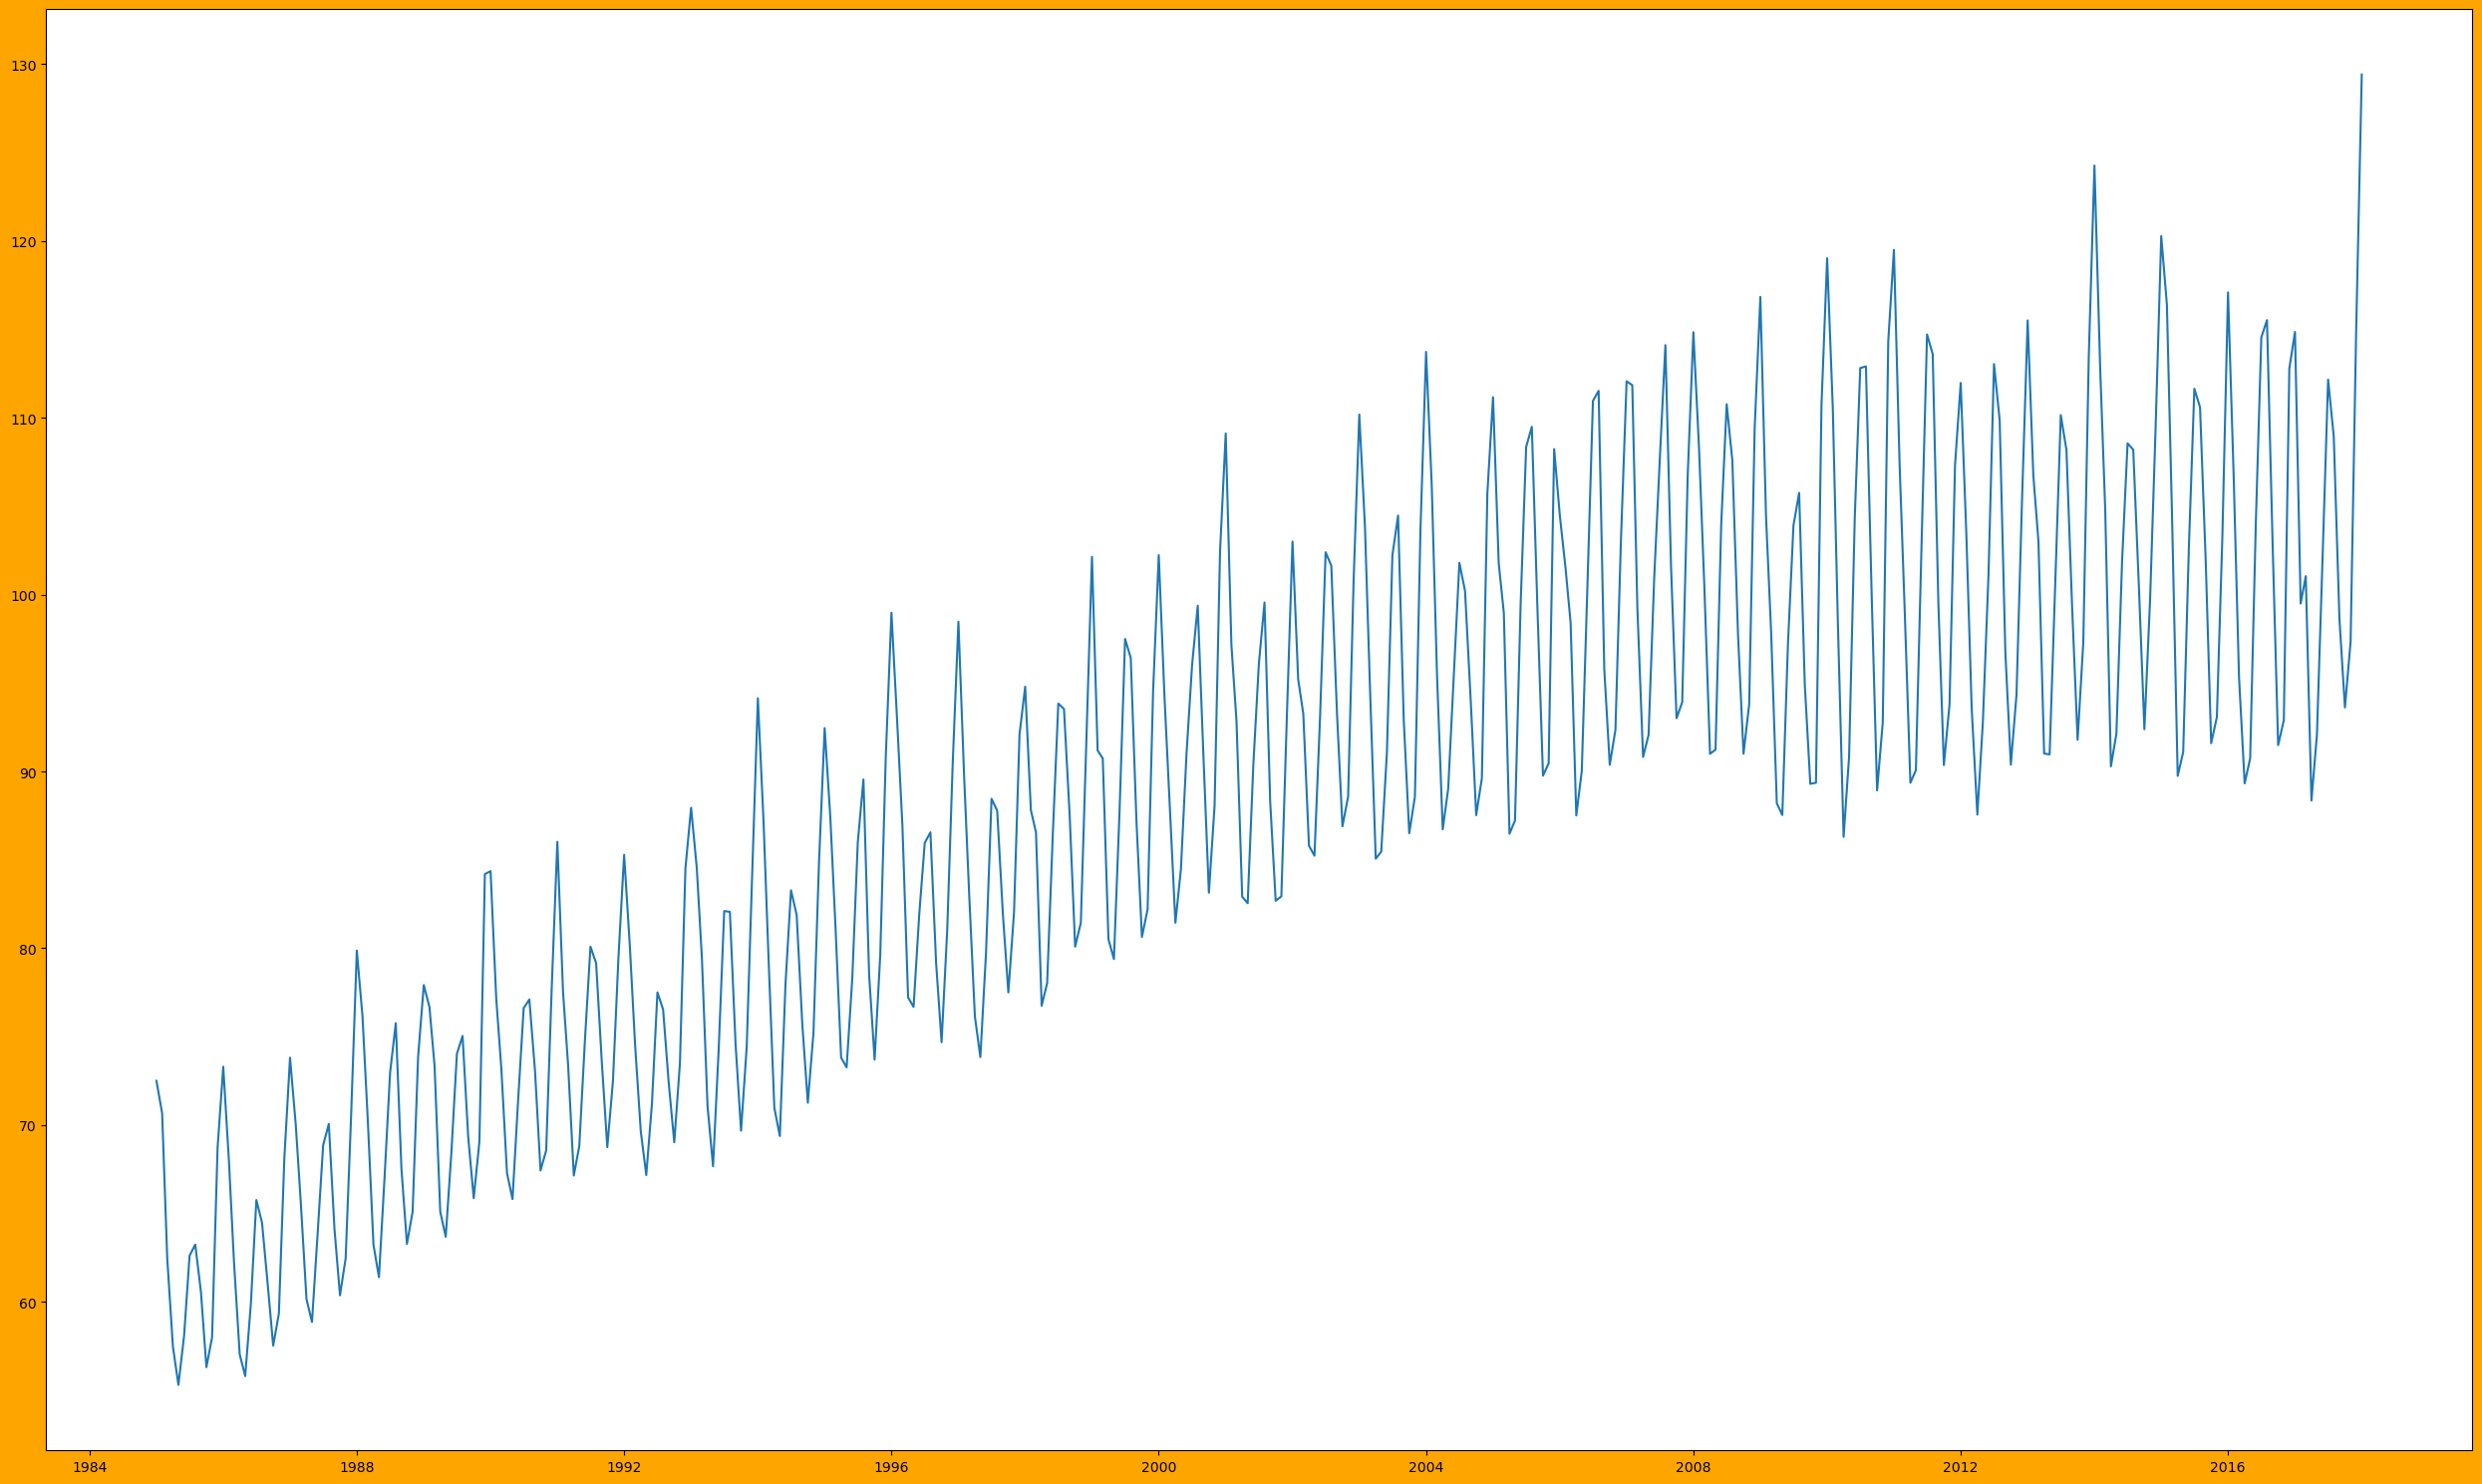

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15),facecolor='orange')#canvas  size

plt.plot(data.IPG2211A2N)#line plot

plt.tight_layout() 
## from plot we can see the series given is not stationary
import warnings
warnings.filterwarnings('ignore') 

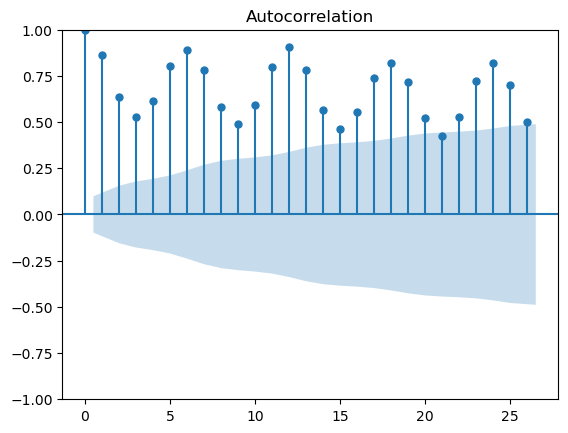

In [31]:
## Plotting the autocorrelation function

from statsmodels.graphics.tsaplots import plot_acf 
import pylab as py

plot_acf(data.IPG2211A2N)
plt.show()

In [33]:
 #ADfuller Test to check stationarity

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.IPG2211A2N)  

print("1. ADF : ",dftest[0]) 

print("2. P-Value : ", dftest[1])

print("3. Num Of Lags : ", dftest[2]) 

print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])

print("5. Critical Values :")

for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.2569903500472432
2. P-Value :  0.18621469116586814
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 381
5. Critical Values :
	 1% :  -3.4476305904172904
	 5% :  -2.869155980820355
	 10% :  -2.570827146203181


In [35]:
data1=data.diff(periods=1)
data1

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563
...,...
2017-09-01,-10.3158
2017-10-01,-5.0017
2017-11-01,3.7222


In [37]:
data1=data1.iloc[1:]
data1

,IPG2211A2N
DATE,
1985-02-01,-1.8332
1985-03-01,-8.2218
1985-04-01,-4.9788
1985-05-01,-2.1563
1985-06-01,2.7753
...,...
2017-09-01,-10.3158
2017-10-01,-5.0017
2017-11-01,3.7222


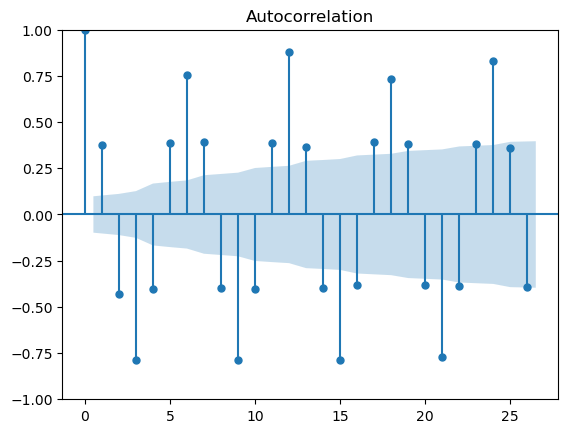

In [39]:
plot_acf(data1.IPG2211A2N); # autocorrelation plot
py.show()

In [41]:
# ADfuller Test to check stationarity

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data1.IPG2211A2N)  

print("1. ADF : ",dftest[0]) 

print("2. P-Value : ", dftest[1])

print("3. Num Of Lags : ", dftest[2]) 

print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])

print("5. Critical Values :")

for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.10489088226736
2. P-Value :  4.0777865655383114e-10
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 381
5. Critical Values :
	 1% :  -3.4476305904172904
	 5% :  -2.869155980820355
	 10% :  -2.570827146203181


In [43]:
data2=data1.diff(periods=1) # differencing applied to data1
data2

,IPG2211A2N
DATE,
1985-02-01,NaN
1985-03-01,-6.3886
1985-04-01,3.2430
1985-05-01,2.8225
1985-06-01,4.9316
...,...
2017-09-01,-7.0932
2017-10-01,5.3141
2017-11-01,8.7239


In [57]:
data2=data2.iloc[1:] # integrated to the order of 2
data2

,IPG2211A2N
DATE,
1985-03-01,-6.3886
1985-04-01,3.2430
1985-05-01,2.8225
1985-06-01,4.9316
1985-07-01,1.7545
...,...
2017-09-01,-7.0932
2017-10-01,5.3141
2017-11-01,8.7239


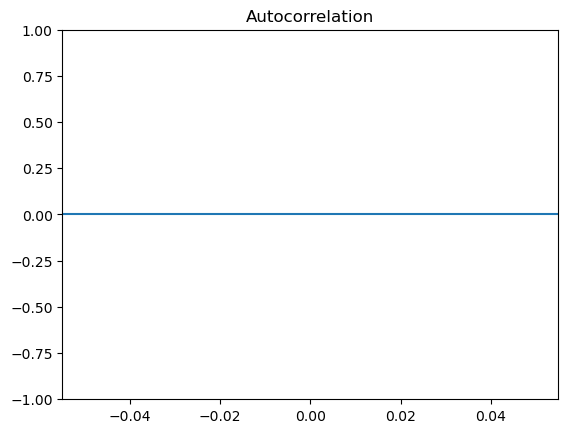

In [45]:
plot_acf(data2.IPG2211A2N); # autocorrelation plot
py.show()

In [49]:
data2

,IPG2211A2N
DATE,
1985-02-01,NaN
1985-03-01,-6.3886
1985-04-01,3.2430
1985-05-01,2.8225
1985-06-01,4.9316
...,...
2017-09-01,-7.0932
2017-10-01,5.3141
2017-11-01,8.7239


In [59]:
data3=data2.diff(periods=1)
data3

,IPG2211A2N
DATE,
1985-03-01,NaN
1985-04-01,9.6316
1985-05-01,-0.4205
1985-06-01,2.1091
1985-07-01,-3.1771
...,...
2017-09-01,6.1300
2017-10-01,12.4073
2017-11-01,3.4098


In [61]:
data3=data3.iloc[1:] # integrated to the order of 2
data3

,IPG2211A2N
DATE,
1985-04-01,9.6316
1985-05-01,-0.4205
1985-06-01,2.1091
1985-07-01,-3.1771
1985-08-01,-5.6560
...,...
2017-09-01,6.1300
2017-10-01,12.4073
2017-11-01,3.4098


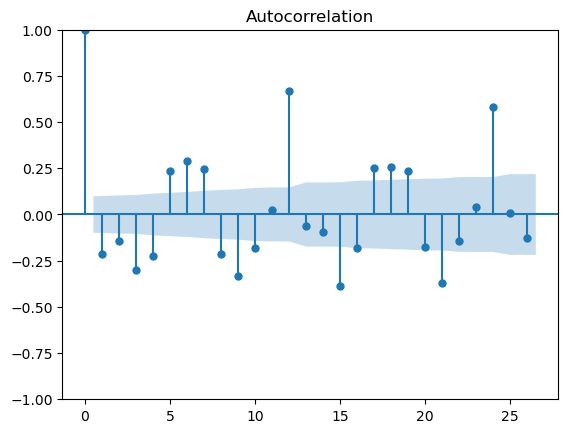

In [129]:
plot_acf(data3.IPG2211A2N); # autocorrelation plot
py.show()

In [63]:
# ADfuller Test to check stationarity

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data3.IPG2211A2N)  

print("1. ADF : ",dftest[0]) 

print("2. P-Value : ", dftest[1])

print("3. Num Of Lags : ", dftest[2]) 

print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])

print("5. Critical Values :")

for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -11.476224510000657
2. P-Value :  5.123269526439559e-21
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 376
5. Critical Values :
	 1% :  -3.4478619826418817
	 5% :  -2.869257669826291
	 10% :  -2.570881358363513


In [65]:
## Creating training and test sets
train = data1[:100] #from 0th row to 99th row - traning data
test = data1[100:] #from 100th row to end - testing data

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1985-02-01 to 1993-05-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [69]:
#pip install statsmodels

In [71]:
## Applying autoregressive model
#from statsmodels.tsa.ar_model import AR
##from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.ar_model import AutoReg

In [73]:
#ar_select_order : gives the best lags ordered as an array

# to select the optimal values for lags
from statsmodels.tsa.ar_model import ar_select_order

mod = ar_select_order(data1,maxlag=15,glob=True)  
mod.ar_lags

# select_order: selects the best number of lags
# maxlag: The maximum lag to consider
# glob: global search across all combinations of lags

C:\Users\RAVALI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RAVALI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15]

In [87]:
import warnings
warnings.filterwarnings('ignore')
## model creation
ar_model = AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) ## object creation with lags specified
ar_model_fit = ar_model.fit() #training the model

In [91]:
##making prediction
prediction = ar_model_fit.predict(start = 100,end = 141)
prediction

1993-06-01    5.120939
1993-07-01    6.444521
1993-08-01   -0.547764
1993-09-01   -4.274800
1993-10-01   -2.878590
1993-11-01    3.833117
1993-12-01    9.718528
1994-01-01    4.543903
1994-02-01   -3.074602
1994-03-01   -6.298520
1994-04-01   -7.396518
1994-05-01   -2.610523
1994-06-01    4.994698
1994-07-01    6.141445
1994-08-01   -0.360570
1994-09-01   -4.438764
1994-10-01   -2.767272
1994-11-01    3.474562
1994-12-01    8.766293
1995-01-01    5.062028
1995-02-01   -2.715943
1995-03-01   -6.940223
1995-04-01   -6.874959
1995-05-01   -1.862842
1995-06-01    4.940777
1995-07-01    5.861478
1995-08-01   -0.218170
1995-09-01   -4.544563
1995-10-01   -2.807240
1995-11-01    3.240748
1995-12-01    8.098825
1996-01-01    5.240285
1996-02-01   -2.395304
1996-03-01   -7.221010
1996-04-01   -6.583596
1996-05-01   -1.243795
1996-06-01    4.966935
1996-07-01    5.613470
1996-08-01   -0.137443
1996-09-01   -4.600246
1996-10-01   -2.912305
1996-11-01    3.053423
Freq: MS, dtype: float64

In [93]:
## importing the library
from statsmodels.tsa.arima.model import ARIMA

In [95]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,0,1)) #order= p,d,q 

model_arima_fit = model_arima.fit() #training

In [97]:
## predicting the output of sample points
predictions = model_arima_fit.forecast(steps=9)
predictions

1993-06-01    0.235412
1993-07-01    0.000941
1993-08-01   -0.027105
1993-09-01   -0.030460
1993-10-01   -0.030861
1993-11-01   -0.030909
1993-12-01   -0.030915
1994-01-01   -0.030915
1994-02-01   -0.030915
Freq: MS, Name: predicted_mean, dtype: float64

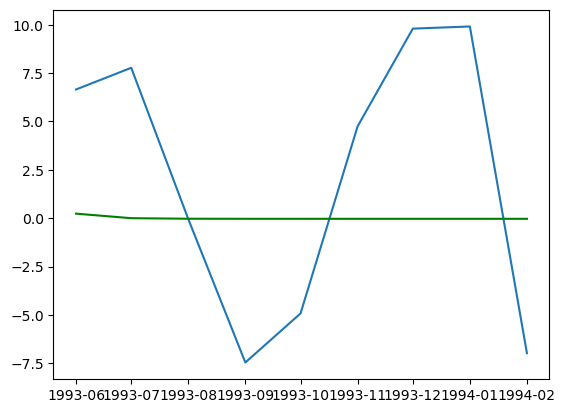

In [131]:
import matplotlib.pyplot as plt
plt.plot(test[:9])
plt.plot(predictions,color='green')
plt.show()

In [133]:
## evaluate the model
print(model_arima_fit.aic)  # Less - Good model
                            # High - Bad model

470.43304723456635


In [135]:
## Geeting the optimal values of p,q an d
import itertools

p =d= q = range(0,4) #values of p,d,q range from 0 to 4

pdq = list(itertools.product(p,d,q)) 
# is used to find the cartesian product from the given iterator, output is lexicographic ordered.
pdq #number of combinaton of pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 0),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 0),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [103]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
list1=[]
list2=[]

for params in pdq: #iterating params over pdq
    try:
        model_arima = ARIMA(train, order=params)#training model on various pdq values
        model_arima_fit = model_arima.fit()#training
        print(params, model_arima_fit.aic)#printing parameter and aic values
        list1.append(params)
        list2.append(model_arima_fit.aic) 
    except:
        continue

(0, 0, 0) 622.1469825379447
(0, 0, 1) 584.0172519498792
(0, 0, 2) 571.7431233138869
(0, 0, 3) 546.9140378101789
(0, 1, 0) 629.9308231227488
(0, 1, 1) 624.448285309214
(0, 1, 2) 582.8559086170396
(0, 1, 3) 581.0739542274024
(0, 2, 0) 671.5237741563009
(0, 2, 1) 631.1809972255686
(0, 2, 2) 625.2002752000475
(0, 2, 3) 588.3425201995608
(0, 3, 0) 743.4775050751552
(0, 3, 1) 672.246760781622
(0, 3, 2) 637.112487518112
(0, 3, 3) 630.4586532750207
(1, 0, 0) 605.2418733170342
(1, 0, 1) 585.2426753516489
(1, 0, 2) 559.3721392462488
(1, 0, 3) 547.257145782374
(1, 1, 0) 628.5333328524854
(1, 1, 1) 603.7735271969149
(1, 1, 2) 583.8953134384219
(1, 1, 3) 582.5697474633571
(1, 2, 0) 671.811002401711
(1, 2, 1) 629.3963865686078
(1, 2, 2) 626.531857162071
(1, 2, 3) 629.1999893574263
(1, 3, 0) 723.89302256449
(1, 3, 1) 672.7942499018466
(1, 3, 2) 676.1945176035055
(1, 3, 3) 631.9376953534945
(2, 0, 0) 542.9834950997498
(2, 0, 1) 507.3457858626368
(2, 0, 2) 488.5508266437632
(2, 0, 3) 489.5183011539042


In [105]:
min(list2)  # lowest aic score

488.5508266437632

In [107]:
list2.index(min(list2))

34

In [109]:
# pdq corresponding to lowest aic
loc = list2.index(min(list2))

list1[loc]

(2, 0, 2)

In [111]:
loc

34

In [113]:
## create the final model with lowest aic score parameter 
model_arima = ARIMA(train, order=(4,0,9)) 

model_arima_fit = model_arima.fit() #training 

In [115]:
print(model_arima_fit.aic) # confirm aic score

470.43304723456635


In [117]:
forecast25 = model_arima_fit.forecast(steps=25)
forecast25

1993-06-01    6.916956
1993-07-01    7.353477
1993-08-01   -3.912744
1993-09-01   -4.204736
1993-10-01   -1.193732
1993-11-01    0.931004
1993-12-01    7.260574
1994-01-01    4.930328
1994-02-01   -1.909632
1994-03-01   -5.974708
1994-04-01   -5.109316
1994-05-01    2.351056
1994-06-01    6.492190
1994-07-01    5.019572
1994-08-01   -1.620188
1994-09-01   -6.527428
1994-10-01   -4.432238
1994-11-01    1.848194
1994-12-01    6.824216
1995-01-01    4.820555
1995-02-01   -1.673601
1995-03-01   -6.366742
1995-04-01   -4.575858
1995-05-01    2.065423
1995-06-01    6.659815
Freq: MS, Name: predicted_mean, dtype: float64

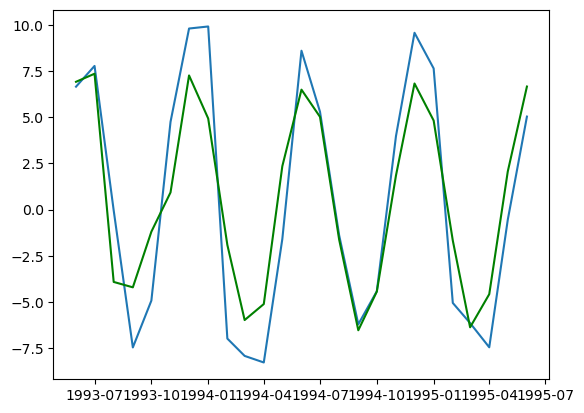

In [119]:
# Comparision of actual vs predicted for 25 values 
import matplotlib.pyplot as plt
plt.plot(test[:25])
plt.plot(forecast25,color='green') #line plot for prediction 

In [121]:
test[0:25]

,IPG2211A2N
DATE,
1993-06-01,6.6535
1993-07-01,7.7751
1993-08-01,-0.0443
1993-09-01,-7.4574
1993-10-01,-4.9221
1993-11-01,4.7482
1993-12-01,9.7992
1994-01-01,9.9102
1994-02-01,-6.9779


In [123]:
test1 = test[0:25].values.flatten() 
test1

array([ 6.6535,  7.7751, -0.0443, -7.4574, -4.9221,  4.7482,  9.7992,
        9.9102, -6.9779, -7.9151, -8.2707, -1.5905,  8.5987,  5.2939,
       -1.3898, -6.2046, -4.4165,  3.9797,  9.5689,  7.6385, -5.0499,
       -6.1372, -7.4494, -0.5485,  5.0344])

In [137]:
# Accuracy metrics
import numpy as np
def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)        # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.sqrt(np.mean((forecast - actual)**2))  # RMSE


    return({'mse':mse, 'mae': mae, 'rmse':rmse})

forecast_accuracy(forecast25, test1)

{'mse': 7.774459438935754,
 'mae': 2.3337798187698326,
 'rmse': 2.788271765616787}

In [139]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse 

# Calculate root mean squared error
print(rmse(test1, forecast25)) 


# Calculate mean squared error
mean_sq_error = mean_squared_error(test1, forecast25)  
 
mean_abs_error = mean_absolute_error(test1,forecast25)
root_mean_squared_error = np.sqrt(mean_sq_error)
print(mean_sq_error) 
print(root_mean_squared_error) 
print(mean_abs_error)

2.788271765616787
7.774459438935754
2.788271765616787
2.3337798187698326
